
# **Amazon Sale Report Analysis**

- Sofi Nurhayati Latifah
- Muhammad Farhan Akmal

These are some questions that we will answer:
1. How does sales performance vary across different categories and sizes?
2. How do sales volumes change over time (daily, weekly, monthly)?
3. What percentage of orders face delivery delays or cancellations?

This dataset provides detailed insights into Amazon sales data, including SKU Code, Design Number, Stock, Category, Size and Color, to help optimize product profitability

- Category: Type of product. (String)
- Size: Size of the product. (String)
- Date: Date of the sale. (Date)
- Status: Status of the sale. (String)
- Fulfilment: Method of fulfilment. (String)
- Style: Style of the product. (String)
- SKU: Stock Keeping Unit. (String)
- ASIN: Amazon Standard Identification Number. (String)
- Courier Status: Status of the courier. (String)
- Qty: Quantity of the product. (Integer)
- Amount: Amount of the sale. (Float)
- B2B: Business to business sale. (Boolean)
- Currency: The currency used for the sale. (String)

# Read Data

Import data from gdrive by using pandas

In [1]:
!pip install gdown

Import library

In [2]:
import gdown
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'https://drive.google.com/uc?id=1gADlbKtspvnOVXk4uxKUiSkWYT28yoju'
output = 'amazon sale report'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1gADlbKtspvnOVXk4uxKUiSkWYT28yoju
To: /content/amazon sale report
100%|██████████| 68.9M/68.9M [00:02<00:00, 26.1MB/s]


'amazon sale report'

In [4]:
df = pd.read_csv('amazon sale report')

<ipython-input-4-2c01fc6ea414>:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('amazon sale report')


Show the count of rows and columns

In [5]:
df.shape

(128975, 24)

Show the first 5 rows

In [6]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


Show the last 5 rows

In [7]:
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.0,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128974,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


Show columns

In [8]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

Show data info

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

# Data Cleaning

Drop unnecessary data

In [10]:
df = df.drop(['index', 'ship-service-level', 'promotion-ids', 'fulfilled-by', 'Unnamed: 22'], axis=1)
print(df.columns)

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ', 'Style',
       'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty', 'currency',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country',
       'B2B'],
      dtype='object')


Check duplicate data

In [11]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 6


In [12]:
duplicate_rows = df[df.duplicated(keep=False)]
print(duplicate_rows)

                  Order ID      Date     Status Fulfilment Sales Channel   \
30660  406-0372545-6086735  04-12-22  Cancelled     Amazon      Amazon.in   
30661  406-0372545-6086735  04-12-22  Cancelled     Amazon      Amazon.in   
41291  408-0373839-4433120  04-05-22  Cancelled     Amazon      Amazon.in   
41292  408-0373839-4433120  04-05-22  Cancelled     Amazon      Amazon.in   
79844  171-9628368-5329958  05-07-22  Cancelled     Amazon      Amazon.in   
79845  171-9628368-5329958  05-07-22  Cancelled     Amazon      Amazon.in   
85790  171-3249942-2207542  05-03-22    Shipped     Amazon      Amazon.in   
85791  171-3249942-2207542  05-03-22    Shipped     Amazon      Amazon.in   
86418  405-8669298-3850736  05-03-22    Shipped     Amazon      Amazon.in   
86419  405-8669298-3850736  05-03-22    Shipped     Amazon      Amazon.in   
98954  407-4853873-4978725  06-22-22    Shipped     Amazon      Amazon.in   
98955  407-4853873-4978725  06-22-22    Shipped     Amazon      Amazon.in   

Drop duplicates

In [13]:
df = df.drop_duplicates(keep='first')
print(f"Number of rows after dropping duplicates: {len(df)}")

Number of rows after dropping duplicates: 128969


Detect missing values for each column

In [14]:
df.isnull().sum()

,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
Style,0
SKU,0
Category,0
Size,0
ASIN,0


Show courier status rows with missing values

In [15]:
courier_status_null = df[df['Courier Status'].isnull()]
print(courier_status_null)

                   Order ID      Date     Status Fulfilment Sales Channel   \
0       405-8078784-5731545  04-30-22  Cancelled   Merchant      Amazon.in   
3       403-9615377-8133951  04-30-22  Cancelled   Merchant      Amazon.in   
23      404-6019946-2909948  04-30-22  Cancelled   Merchant      Amazon.in   
29      404-5933402-8801952  04-30-22  Cancelled   Merchant      Amazon.in   
83      404-6522553-9345930  04-30-22  Cancelled   Merchant      Amazon.in   
...                     ...       ...        ...        ...            ...   
128762  402-4651401-6366769  06-01-22  Cancelled   Merchant      Amazon.in   
128808  408-4182027-2307535  06-01-22  Cancelled   Merchant      Amazon.in   
128855  402-1958677-2521967  06-01-22  Cancelled   Merchant      Amazon.in   
128875  403-9524128-9243508  06-01-22  Cancelled   Merchant      Amazon.in   
128890  407-0116398-1810752  05-31-22  Cancelled   Merchant      Amazon.in   

          Style                  SKU       Category  Size      

Count values of courier status column

In [16]:
df['Courier Status'].value_counts()

,count
Courier Status,
Shipped,109484
Unshipped,6681
Cancelled,5932


Check spread of data attribute from Courier Status column

In [17]:
pd.crosstab(df['Courier Status'], df['Status'], margins=True)

Status,Cancelled,Pending,Pending - Waiting for Pick Up,Shipped,Shipped - Damaged,Shipped - Delivered to Buyer,Shipped - Lost in Transit,Shipped - Out for Delivery,Shipped - Picked Up,Shipped - Rejected by Buyer,Shipped - Returned to Seller,Shipped - Returning to Seller,Shipping,All
Courier Status,,,,,,,,,,,,,,
Cancelled,5837,2,0,93,0,0,0,0,0,0,0,0,0,5932
Shipped,0,10,0,77593,1,28761,5,35,973,11,1950,145,0,109484
Unshipped,5631,646,281,115,0,0,0,0,0,0,0,0,8,6681
All,11468,658,281,77801,1,28761,5,35,973,11,1950,145,8,122097


Group data Courier Status by Status

In [18]:
grouped_data = df[df['Courier Status'].isnull()].groupby(['Status'])['Status'].count()
print(grouped_data)

Status
Cancelled                       6861
Shipped - Delivered to Buyer       8
Shipped - Returned to Seller       3
Name: Status, dtype: int64


Fill Courier Status null with information based on group by Status

In [19]:
df.loc[(df['Courier Status'].isnull()) & (df['Status'] == 'Cancelled'), 'Courier Status'] = 'Cancelled'

In [20]:
df.loc[(df['Courier Status'].isnull()) & (df['Status'].isin(['Shipped - Delivered to Buyer', 'Shipped - Returned to Seller'])), 'Courier Status'] = 'Shipped'
print(df.head())

              Order ID      Date                        Status Fulfilment  \
0  405-8078784-5731545  04-30-22                     Cancelled   Merchant   
1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   Merchant   
2  404-0687676-7273146  04-30-22                       Shipped     Amazon   
3  403-9615377-8133951  04-30-22                     Cancelled   Merchant   
4  407-1069790-7240320  04-30-22                       Shipped     Amazon   

  Sales Channel     Style              SKU       Category Size        ASIN  \
0      Amazon.in   SET389   SET389-KR-NP-S            Set    S  B09KXVBD7Z   
1      Amazon.in  JNE3781  JNE3781-KR-XXXL          kurta  3XL  B09K3WFS32   
2      Amazon.in  JNE3371    JNE3371-KR-XL          kurta   XL  B07WV4JV4D   
3      Amazon.in    J0341       J0341-DR-L  Western Dress    L  B099NRCT7B   
4      Amazon.in  JNE3671  JNE3671-TU-XXXL            Top  3XL  B098714BZP   

  Courier Status  Qty currency  Amount    ship-city   ship-state  \


Show count of null values after attributes has been filled

In [21]:
df['Courier Status'].isnull().sum()

0

Show currency rows with missing values

In [22]:
currency_null = df[df['currency'].isnull()]
print(currency_null)

                   Order ID      Date     Status Fulfilment Sales Channel   \
8       407-5443024-5233168  04-30-22  Cancelled     Amazon      Amazon.in   
29      404-5933402-8801952  04-30-22  Cancelled   Merchant      Amazon.in   
65      171-4137548-0481151  04-30-22  Cancelled     Amazon      Amazon.in   
84      403-9950518-0349133  04-30-22  Cancelled     Amazon      Amazon.in   
95      405-9112089-3379536  04-30-22  Cancelled     Amazon      Amazon.in   
...                     ...       ...        ...        ...            ...   
128903  406-3923120-4345139  05-31-22  Cancelled     Amazon      Amazon.in   
128907  403-6757403-6097100  05-31-22  Cancelled     Amazon      Amazon.in   
128908  403-6757403-6097100  05-31-22  Cancelled     Amazon      Amazon.in   
128958  408-9513596-4393945  05-31-22  Cancelled     Amazon      Amazon.in   
128967  404-5182288-1653947  05-31-22  Cancelled     Amazon      Amazon.in   

          Style                  SKU Category Size        ASIN 

Count values of currency

In [23]:
df['currency'].value_counts()

,count
currency,
INR,121177


Fill null data in currency with INR

In [24]:
df['currency'].fillna('INR', inplace=True)
print(df.head())

              Order ID      Date                        Status Fulfilment  \
0  405-8078784-5731545  04-30-22                     Cancelled   Merchant   
1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   Merchant   
2  404-0687676-7273146  04-30-22                       Shipped     Amazon   
3  403-9615377-8133951  04-30-22                     Cancelled   Merchant   
4  407-1069790-7240320  04-30-22                       Shipped     Amazon   

  Sales Channel     Style              SKU       Category Size        ASIN  \
0      Amazon.in   SET389   SET389-KR-NP-S            Set    S  B09KXVBD7Z   
1      Amazon.in  JNE3781  JNE3781-KR-XXXL          kurta  3XL  B09K3WFS32   
2      Amazon.in  JNE3371    JNE3371-KR-XL          kurta   XL  B07WV4JV4D   
3      Amazon.in    J0341       J0341-DR-L  Western Dress    L  B099NRCT7B   
4      Amazon.in  JNE3671  JNE3671-TU-XXXL            Top  3XL  B098714BZP   

  Courier Status  Qty currency  Amount    ship-city   ship-state  \


<ipython-input-24-cb0c8c3b6d5b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['currency'].fillna('INR', inplace=True)


Show count of null values after attributes has been filled

In [25]:
df['currency'].isnull().sum()

0

Show amount attribute with missing values

In [26]:
amount_null = df[df['Amount'].isnull()]
print(amount_null)

                   Order ID      Date     Status Fulfilment Sales Channel   \
8       407-5443024-5233168  04-30-22  Cancelled     Amazon      Amazon.in   
29      404-5933402-8801952  04-30-22  Cancelled   Merchant      Amazon.in   
65      171-4137548-0481151  04-30-22  Cancelled     Amazon      Amazon.in   
84      403-9950518-0349133  04-30-22  Cancelled     Amazon      Amazon.in   
95      405-9112089-3379536  04-30-22  Cancelled     Amazon      Amazon.in   
...                     ...       ...        ...        ...            ...   
128903  406-3923120-4345139  05-31-22  Cancelled     Amazon      Amazon.in   
128907  403-6757403-6097100  05-31-22  Cancelled     Amazon      Amazon.in   
128908  403-6757403-6097100  05-31-22  Cancelled     Amazon      Amazon.in   
128958  408-9513596-4393945  05-31-22  Cancelled     Amazon      Amazon.in   
128967  404-5182288-1653947  05-31-22  Cancelled     Amazon      Amazon.in   

          Style                  SKU Category Size        ASIN 

Count values of amount attribute

In [27]:
df['Amount'].value_counts()

,count
Amount,
399.00,5442
771.00,2797
735.00,2436
0.00,2343
487.00,2293
...,...
558.10,1
551.42,1
973.00,1


Group amount attribute with ASIN

In [28]:
grouped_amount_asin = df.groupby('ASIN')['Amount'].sum()
print(grouped_amount_asin)

ASIN
B01LYC0N7Q    10629.91
B01LYC0NV1     5630.90
B01LZMXYSV     3547.62
B01LZYQ93J     4111.85
B01M0LXTZE     3772.00
                ...   
B0B4992J2M     1449.00
B0B4994HY6     1399.00
B0B499JD9S     1449.00
B0B49CGL99     1449.00
B0B4GDJ9MK      999.00
Name: Amount, Length: 7190, dtype: float64


Fill null data

In [29]:
df['Amount'] = df.groupby('ASIN')['Amount'].transform(lambda x: x.fillna(x.mean()))


Count null data

In [30]:
df['Amount'].isnull().sum()

43

In [31]:
df['Amount'].fillna(df['Amount'].mean(), inplace=True)
print(df['Amount'].isnull().sum())

0


<ipython-input-31-09e44b203e15>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount'].fillna(df['Amount'].mean(), inplace=True)


Show ship-city attribute with missing values

In [32]:
city_null = df[df['ship-city'].isnull()]
print(city_null.head())

                  Order ID      Date     Status Fulfilment Sales Channel   \
1871   404-0566904-4825137  04-29-22    Shipped     Amazon      Amazon.in   
1872   404-0566904-4825137  04-29-22    Shipped     Amazon      Amazon.in   
8752   406-4003386-8768363  04-25-22    Shipped     Amazon      Amazon.in   
11215  402-0107720-7057168  04-23-22    Shipped     Amazon      Amazon.in   
13252  407-4532637-8415521  04-22-22  Cancelled   Merchant      Amazon.in   

         Style           SKU Category Size        ASIN Courier Status  Qty  \
1871     J0301    J0301-TP-L      Top    L  B099S6795L        Shipped    1   
1872   JNE3697  JNE3697-KR-L    kurta    L  B09811Y7WM        Shipped    1   
8752   JNE3376  JNE3376-KR-M    kurta    M  B082W7HW86        Shipped    1   
11215    J0003   J0003-SET-S      Set    S  B0894X27FC        Shipped    1   
13252  JNE3405  JNE3405-KR-S    kurta    S  B081WX4G4Q      Cancelled    0   

      currency  Amount ship-city ship-state  ship-postal-code ship-c

Fill null data with Unknown

In [33]:
df['ship-city'].fillna('Unknown', inplace=True)

<ipython-input-33-a13b7e39a785>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ship-city'].fillna('Unknown', inplace=True)


Count the number of null data

In [34]:
df['ship-city'].isnull().sum()

0

Show ship-state attribute with missing values

In [35]:
state_null = df[df['ship-state'].isnull()]
print(state_null.head())

                  Order ID      Date     Status Fulfilment Sales Channel   \
1871   404-0566904-4825137  04-29-22    Shipped     Amazon      Amazon.in   
1872   404-0566904-4825137  04-29-22    Shipped     Amazon      Amazon.in   
8752   406-4003386-8768363  04-25-22    Shipped     Amazon      Amazon.in   
11215  402-0107720-7057168  04-23-22    Shipped     Amazon      Amazon.in   
13252  407-4532637-8415521  04-22-22  Cancelled   Merchant      Amazon.in   

         Style           SKU Category Size        ASIN Courier Status  Qty  \
1871     J0301    J0301-TP-L      Top    L  B099S6795L        Shipped    1   
1872   JNE3697  JNE3697-KR-L    kurta    L  B09811Y7WM        Shipped    1   
8752   JNE3376  JNE3376-KR-M    kurta    M  B082W7HW86        Shipped    1   
11215    J0003   J0003-SET-S      Set    S  B0894X27FC        Shipped    1   
13252  JNE3405  JNE3405-KR-S    kurta    S  B081WX4G4Q      Cancelled    0   

      currency  Amount ship-city ship-state  ship-postal-code ship-c

Fill null data

In [36]:
df['ship-state'].fillna('Unknown', inplace=True)

<ipython-input-36-b409255a16f8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ship-state'].fillna('Unknown', inplace=True)


Count null data

In [37]:
df['ship-state'].isnull().sum()

0

Show ship-postal-code attribute with missing value

In [38]:
postal_code_null = df[df['ship-postal-code'].isnull()]
print(postal_code_null.head())

                  Order ID      Date     Status Fulfilment Sales Channel   \
1871   404-0566904-4825137  04-29-22    Shipped     Amazon      Amazon.in   
1872   404-0566904-4825137  04-29-22    Shipped     Amazon      Amazon.in   
8752   406-4003386-8768363  04-25-22    Shipped     Amazon      Amazon.in   
11215  402-0107720-7057168  04-23-22    Shipped     Amazon      Amazon.in   
13252  407-4532637-8415521  04-22-22  Cancelled   Merchant      Amazon.in   

         Style           SKU Category Size        ASIN Courier Status  Qty  \
1871     J0301    J0301-TP-L      Top    L  B099S6795L        Shipped    1   
1872   JNE3697  JNE3697-KR-L    kurta    L  B09811Y7WM        Shipped    1   
8752   JNE3376  JNE3376-KR-M    kurta    M  B082W7HW86        Shipped    1   
11215    J0003   J0003-SET-S      Set    S  B0894X27FC        Shipped    1   
13252  JNE3405  JNE3405-KR-S    kurta    S  B081WX4G4Q      Cancelled    0   

      currency  Amount ship-city ship-state  ship-postal-code ship-c

Fill null data

In [39]:
df['ship-postal-code'].fillna('Unknown', inplace=True)

<ipython-input-39-ded30da65a1d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ship-postal-code'].fillna('Unknown', inplace=True)
<ipython-input-39-ded30da65a1d>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['ship-postal-code'].fillna('Unknown', inplace=True)


Count null data

In [40]:
df['ship-postal-code'].isnull().sum()

0

Show null values of ship-country

In [41]:
country_null = df[df['ship-country'].isnull()]
print(country_null.head())

                  Order ID      Date     Status Fulfilment Sales Channel   \
1871   404-0566904-4825137  04-29-22    Shipped     Amazon      Amazon.in   
1872   404-0566904-4825137  04-29-22    Shipped     Amazon      Amazon.in   
8752   406-4003386-8768363  04-25-22    Shipped     Amazon      Amazon.in   
11215  402-0107720-7057168  04-23-22    Shipped     Amazon      Amazon.in   
13252  407-4532637-8415521  04-22-22  Cancelled   Merchant      Amazon.in   

         Style           SKU Category Size        ASIN Courier Status  Qty  \
1871     J0301    J0301-TP-L      Top    L  B099S6795L        Shipped    1   
1872   JNE3697  JNE3697-KR-L    kurta    L  B09811Y7WM        Shipped    1   
8752   JNE3376  JNE3376-KR-M    kurta    M  B082W7HW86        Shipped    1   
11215    J0003   J0003-SET-S      Set    S  B0894X27FC        Shipped    1   
13252  JNE3405  JNE3405-KR-S    kurta    S  B081WX4G4Q      Cancelled    0   

      currency  Amount ship-city ship-state ship-postal-code ship-co

Count attribute of ship-country

In [42]:
df['ship-country'].value_counts()

,count
ship-country,
IN,128936


Fill null attribute with IN

In [43]:
df['ship-country'].fillna('IN', inplace=True)

<ipython-input-43-be18d74795c9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ship-country'].fillna('IN', inplace=True)


Count null values after attribute has been filled

In [44]:
df['ship-country'].isnull().sum()

0

Show data after all missing value has been filled

In [45]:
print(df)

                   Order ID      Date                        Status  \
0       405-8078784-5731545  04-30-22                     Cancelled   
1       171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2       404-0687676-7273146  04-30-22                       Shipped   
3       403-9615377-8133951  04-30-22                     Cancelled   
4       407-1069790-7240320  04-30-22                       Shipped   
...                     ...       ...                           ...   
128970  406-6001380-7673107  05-31-22                       Shipped   
128971  402-9551604-7544318  05-31-22                       Shipped   
128972  407-9547469-3152358  05-31-22                       Shipped   
128973  402-6184140-0545956  05-31-22                       Shipped   
128974  408-7436540-8728312  05-31-22                       Shipped   

       Fulfilment Sales Channel     Style              SKU       Category  \
0        Merchant      Amazon.in   SET389   SET389-KR-NP-S            

Check missing values after data has been filled

In [46]:
print(df.isnull().sum())

Order ID            0
Date                0
Status              0
Fulfilment          0
Sales Channel       0
Style               0
SKU                 0
Category            0
Size                0
ASIN                0
Courier Status      0
Qty                 0
currency            0
Amount              0
ship-city           0
ship-state          0
ship-postal-code    0
ship-country        0
B2B                 0
dtype: int64


Outlier handling

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


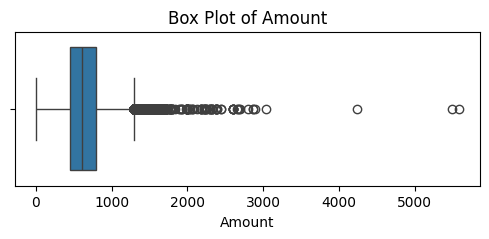

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


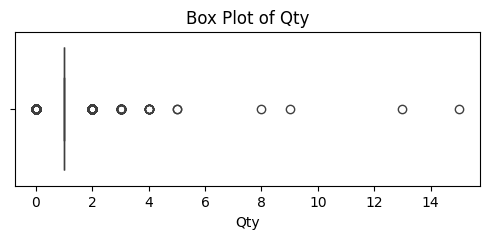

In [47]:
# Check for outliers using box plots for numerical columns
numerical_columns = ['Amount', 'Qty']
for column in numerical_columns:
  plt.figure(figsize=(6, 2))
  sns.boxplot(x=df[column])
  plt.title(f'Box Plot of {column}')
  plt.show()

In [48]:
# Let's handle outliers in the 'Amount' column using IQR method
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the upper or lower bound
df['Amount'] = np.where(df['Amount'] > upper_bound, upper_bound,
                       np.where(df['Amount'] < lower_bound, lower_bound, df['Amount']))

print(df.describe())


                Qty         Amount
count  128969.00000  128969.000000
mean        0.90445     644.555641
std         0.31333     267.547369
min         0.00000       0.000000
25%         1.00000     448.570000
50%         1.00000     605.000000
75%         1.00000     788.000000
max        15.00000    1297.145000


Change datatype into categorical attribute

In [49]:
categorical_columns = ['Fulfilment','Sales Channel ', 'Category', 'Status', 'Courier Status', 'currency', 'Size']
for column in categorical_columns:
  df[column] = df[column].astype('category')

Change data type attribute date

In [50]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 128969 entries, 0 to 128974
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          128969 non-null  object        
 1   Date              128969 non-null  datetime64[ns]
 2   Status            128969 non-null  category      
 3   Fulfilment        128969 non-null  category      
 4   Sales Channel     128969 non-null  category      
 5   Style             128969 non-null  object        
 6   SKU               128969 non-null  object        
 7   Category          128969 non-null  category      
 8   Size              128969 non-null  category      
 9   ASIN              128969 non-null  object        
 10  Courier Status    128969 non-null  category      
 11  Qty               128969 non-null  int64         
 12  currency          128969 non-null  category      
 13  Amount            128969 non-null  float64       
 14  ship-city

<ipython-input-50-9adc260b9018>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


# Exploratory Data Analysis

Check statistic description

In [51]:
df.describe()

,Date,Qty,Amount
count,128969,128969.00000,128969.000000
mean,2022-05-12 11:50:02.758802176,0.90445,644.555641
min,2022-03-31 00:00:00,0.00000,0.000000
25%,2022-04-20 00:00:00,1.00000,448.570000
50%,2022-05-10 00:00:00,1.00000,605.000000
75%,2022-06-04 00:00:00,1.00000,788.000000
max,2022-06-29 00:00:00,15.00000,1297.145000
std,NaN,0.31333,267.547369


Analyze individual variables

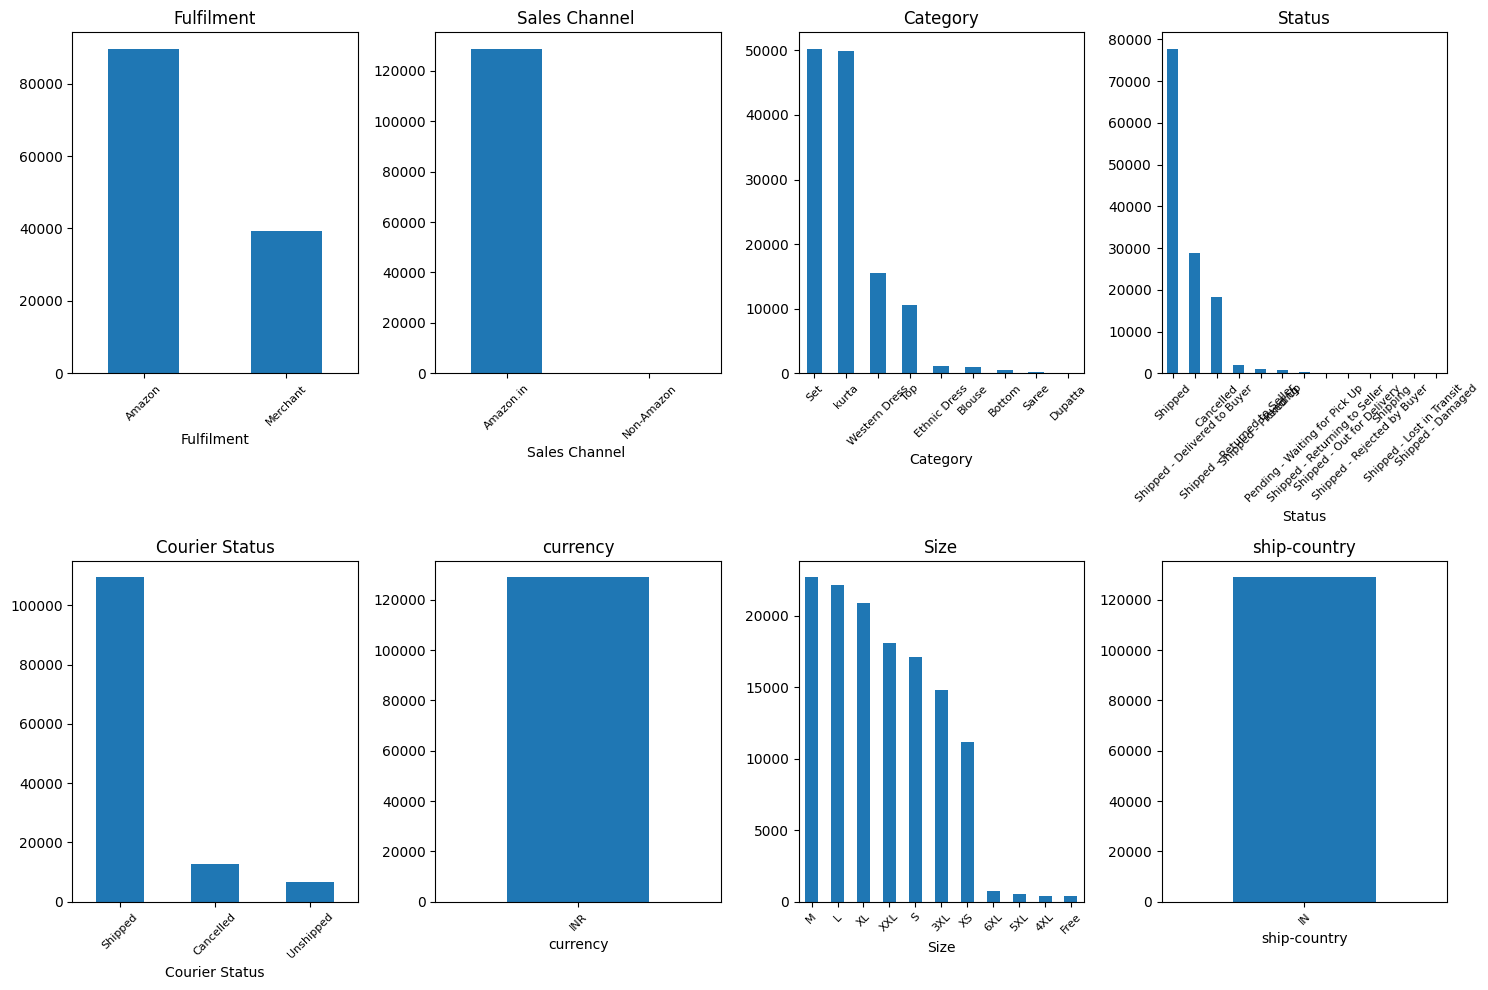

In [52]:
import matplotlib.pyplot as plt

# Create a figure and axes for the subplots (2 rows, 4 columns)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))

# List of categorical columns
categorical_columns = ['Fulfilment', 'Sales Channel ', 'Category', 'Status', 'Courier Status', 'currency', 'Size', 'ship-country']

# Iterate through the categorical columns and plot the bar chart on the subplots
for i, column in enumerate(categorical_columns):
    row = i // 4  # Calculate the row index
    col = i % 4   # Calculate the column index
    df[column].value_counts().plot(kind='bar', ax=axes[row, col])
    axes[row, col].set_title(column)
    axes[row, col].tick_params(axis='x', rotation=45, labelsize=8)

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

Analyze the relationship between two variables

         Amount      Qty
Amount  1.00000  0.02926
Qty     0.02926  1.00000


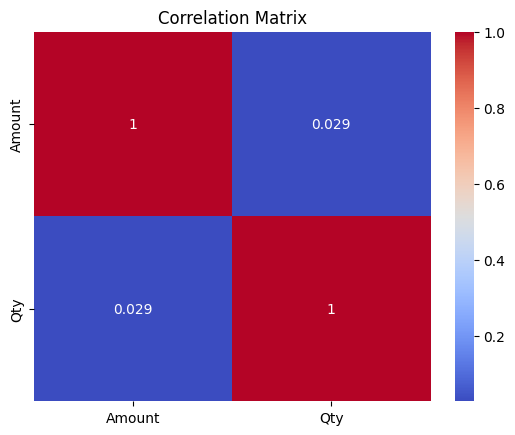

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


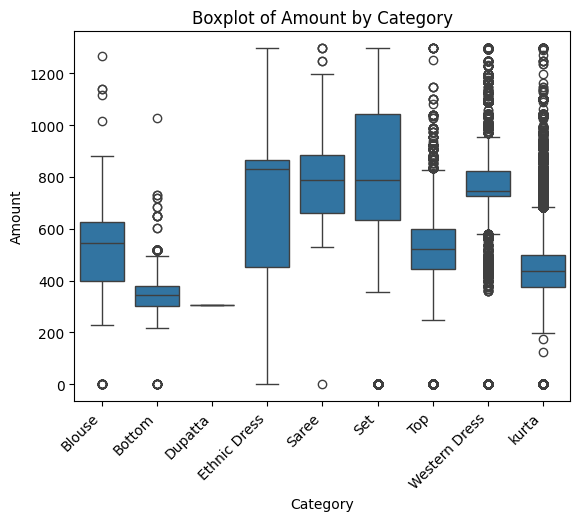

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


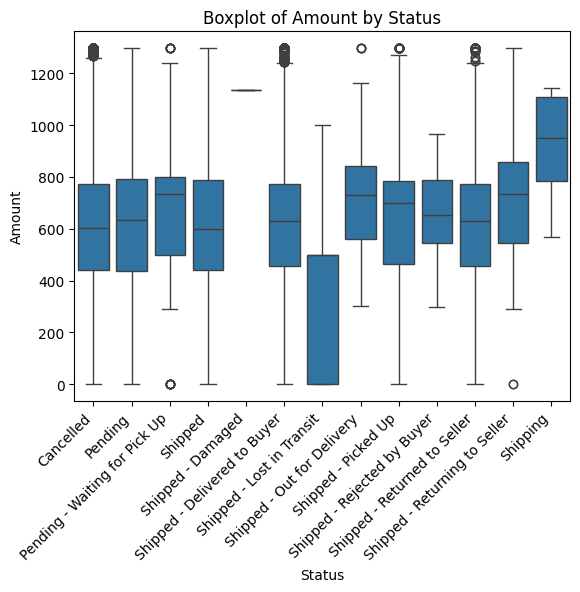

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


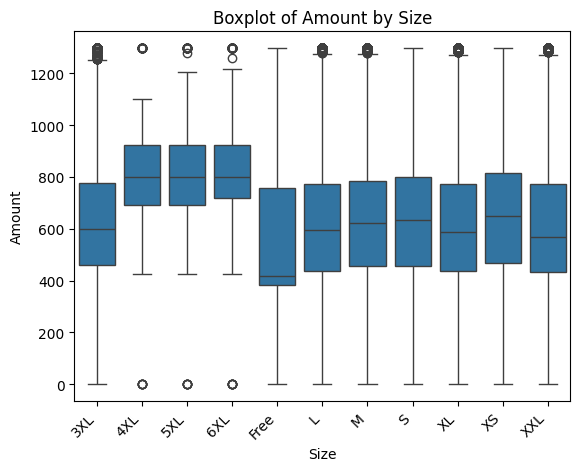

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


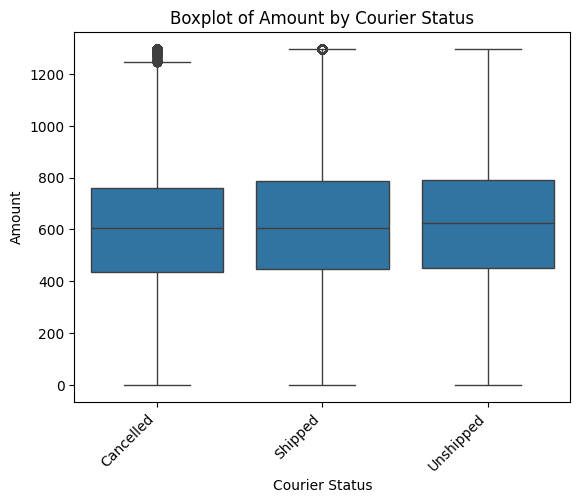

<ipython-input-53-b291c7bb16b2>:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_status = df.groupby('Status')['Amount'].sum().sort_values(ascending=False)


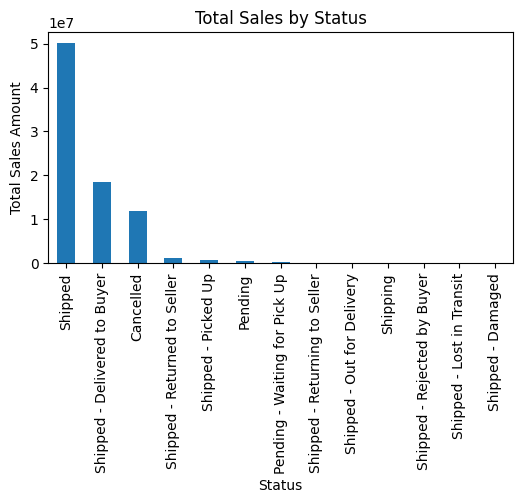

<ipython-input-53-b291c7bb16b2>:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_size = df.groupby('Size')['Amount'].sum().sort_values(ascending=False)


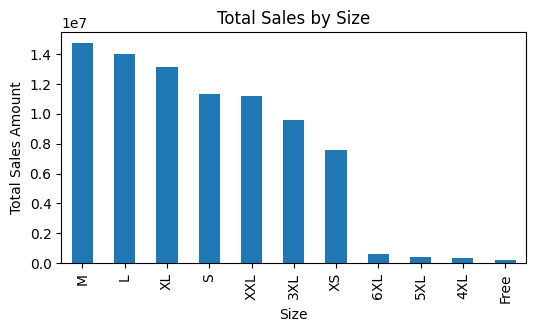

<ipython-input-53-b291c7bb16b2>:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_courier_status = df.groupby('Courier Status')['Amount'].sum().sort_values(ascending=False)


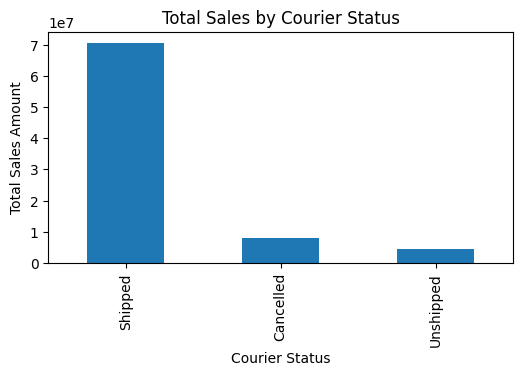

In [53]:
# Correlation matrix for numerical variables
correlation_matrix = df[['Amount', 'Qty']].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Analyze the relationship between categorical variables and numerical variables
sns.boxplot(x='Category', y='Amount', data=df)
plt.title('Boxplot of Amount by Category')
plt.xticks(rotation=45, ha='right')
plt.show()

sns.boxplot(x='Status', y='Amount', data=df)
plt.title('Boxplot of Amount by Status')
plt.xticks(rotation=45, ha='right')
plt.show()

sns.boxplot(x='Size', y='Amount', data=df)
plt.title('Boxplot of Amount by Size')
plt.xticks(rotation=45, ha='right')
plt.show()

sns.boxplot(x='Courier Status', y='Amount', data=df)
plt.title('Boxplot of Amount by Courier Status')
plt.xticks(rotation=45, ha='right')
plt.show()

# Group data by Status and analyze the sales amount
sales_by_status = df.groupby('Status')['Amount'].sum().sort_values(ascending=False)
sales_by_status.plot(kind='bar', figsize=(6, 3))
plt.title('Total Sales by Status')
plt.xlabel('Status')
plt.ylabel('Total Sales Amount')
plt.show()

# Group data by Size and analyze the sales amount
sales_by_size = df.groupby('Size')['Amount'].sum().sort_values(ascending=False)
sales_by_size.plot(kind='bar', figsize=(6, 3))
plt.title('Total Sales by Size')
plt.xlabel('Size')
plt.ylabel('Total Sales Amount')
plt.show()

# Group data by Courier Status and analyze the sales amount
sales_by_courier_status = df.groupby('Courier Status')['Amount'].sum().sort_values(ascending=False)
sales_by_courier_status.plot(kind='bar', figsize=(6, 3))
plt.title('Total Sales by Courier Status')
plt.xlabel('Courier Status')
plt.ylabel('Total Sales Amount')
plt.show()

Analyze relationship between multiple attribute

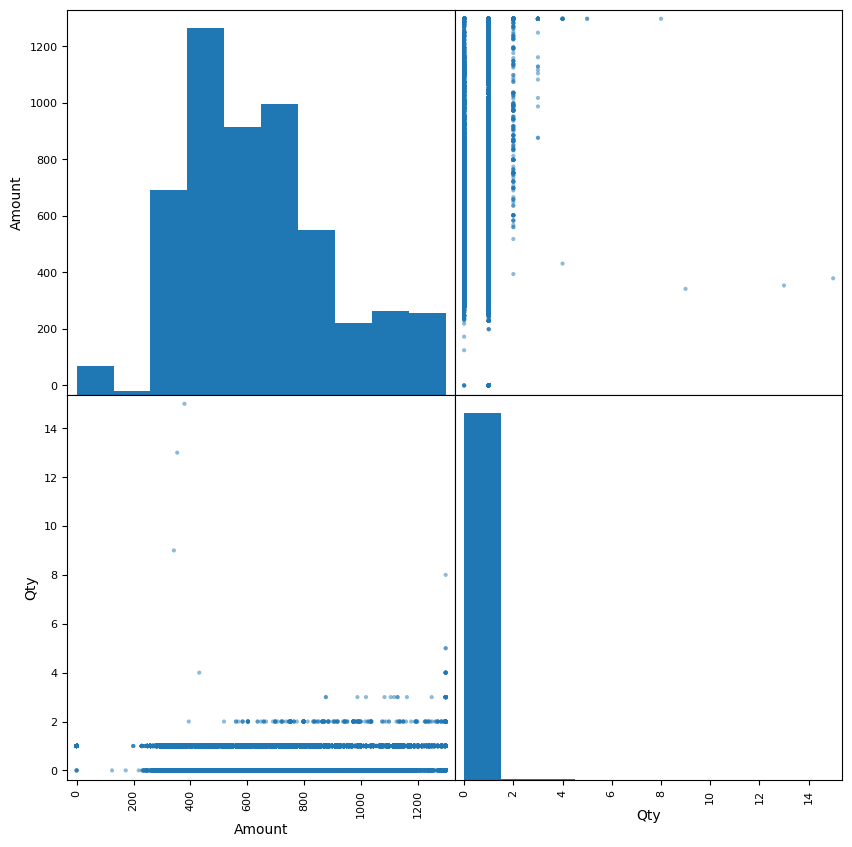

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


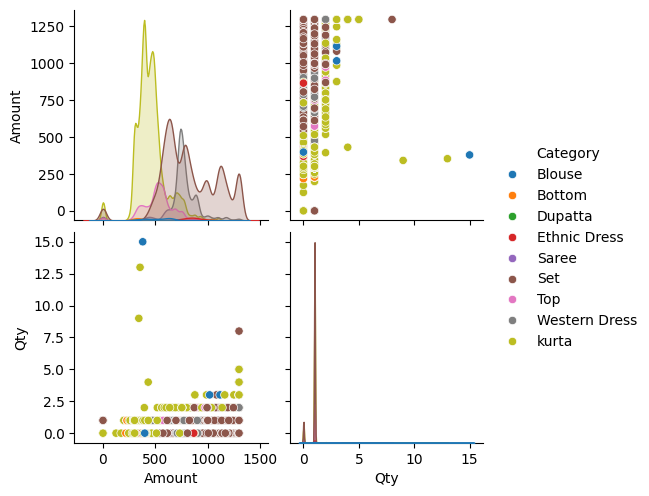

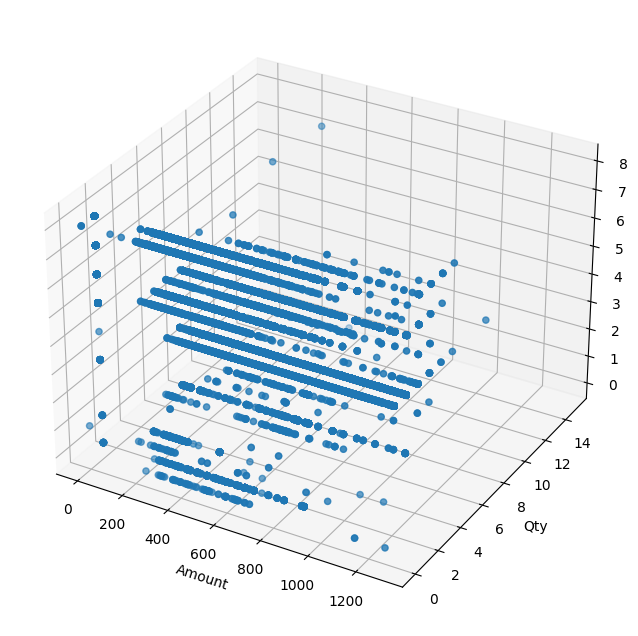

<ipython-input-54-5b141bbea505>:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_category_status = df.groupby(['Category', 'Status'])['Amount'].sum().unstack()


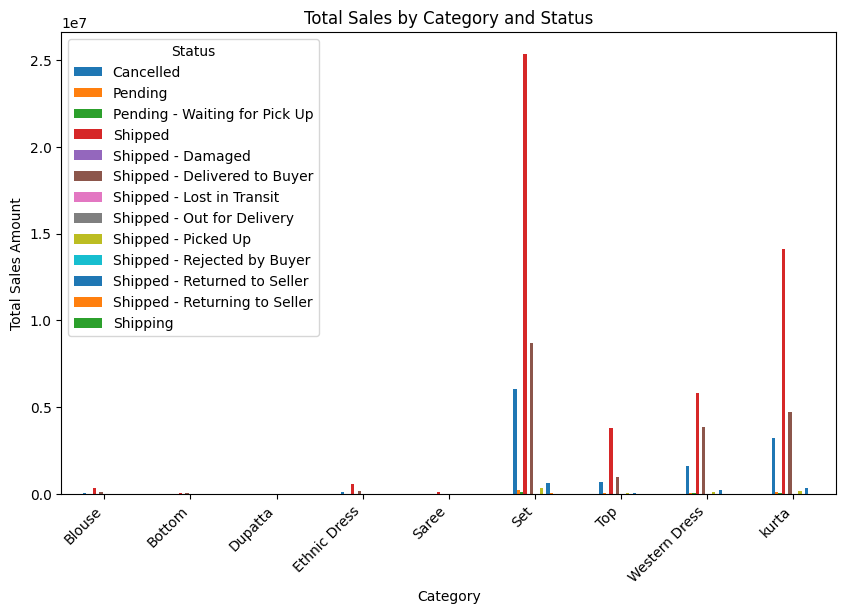

In [54]:
from pandas.plotting import scatter_matrix

# Select the numerical columns for the scatter matrix
numerical_columns = ['Amount', 'Qty']
scatter_matrix(df[numerical_columns], figsize=(10, 10), alpha=0.5)
plt.show()

# Analyze the relationship between multiple variables using a pairplot
sns.pairplot(df[['Amount', 'Qty', 'Category']], hue='Category')
plt.show()


# Analyze the relationship between multiple variables using a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Amount'], df['Qty'], df['Category'].cat.codes)

ax.set_xlabel('Amount')
ax.set_ylabel('Qty')
ax.set_zlabel('Category')

plt.show()

# Analyze the relationship between multiple variables using grouped bar chart
sales_by_category_status = df.groupby(['Category', 'Status'])['Amount'].sum().unstack()
sales_by_category_status.plot(kind='bar', figsize=(10, 6))
plt.title('Total Sales by Category and Status')
plt.xlabel('Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status')
plt.show()


Check time-based attribute relation

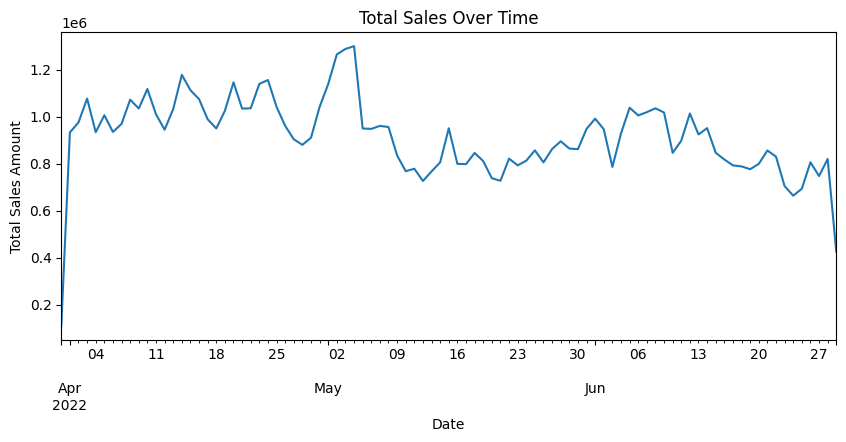

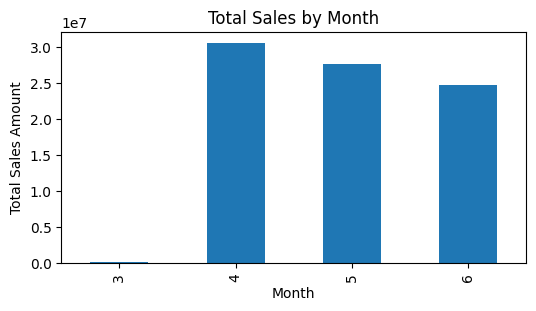

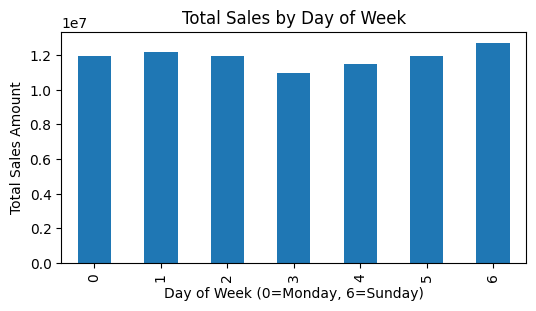

In [55]:
# Group data by date and analyze the sales amount
sales_by_date = df.groupby('Date')['Amount'].sum()
sales_by_date.plot(figsize=(10, 4))
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.show()

# Group data by month and analyze the sales amount
df['Month'] = df['Date'].dt.month
sales_by_month = df.groupby('Month')['Amount'].sum()
sales_by_month.plot(kind='bar', figsize=(6, 3))
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.show()

# Group data by day of week and analyze the sales amount
df['DayOfWeek'] = df['Date'].dt.dayofweek
sales_by_dayofweek = df.groupby('DayOfWeek')['Amount'].sum()
sales_by_dayofweek.plot(kind='bar', figsize=(6, 3))
plt.title('Total Sales by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Total Sales Amount')
plt.show()


#Answering Questions

1. How does sales performance vary across different categories and sizes?

<ipython-input-56-8a4064296b60>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_category = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)


Category
Set              4.142377e+07
kurta            2.270232e+07
Western Dress    1.180528e+07
Top              5.587143e+06
Ethnic Dress     8.389554e+05
Blouse           4.817437e+05
Bottom           1.589935e+05
Saree            1.285811e+05
Dupatta          9.150000e+02
Name: Amount, dtype: float64


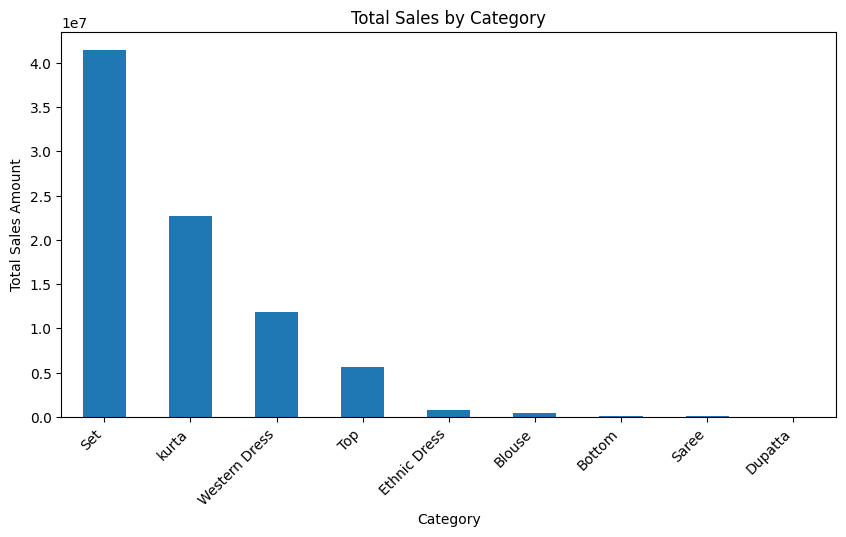

<ipython-input-56-8a4064296b60>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_size = df.groupby('Size')['Amount'].sum().sort_values(ascending=False)


Size
M       1.472846e+07
L       1.400783e+07
XL      1.311903e+07
S       1.131075e+07
XXL     1.121735e+07
3XL     9.589577e+06
XS      7.552628e+06
6XL     5.987019e+05
5XL     4.415810e+05
4XL     3.463739e+05
Free    2.154132e+05
Name: Amount, dtype: float64


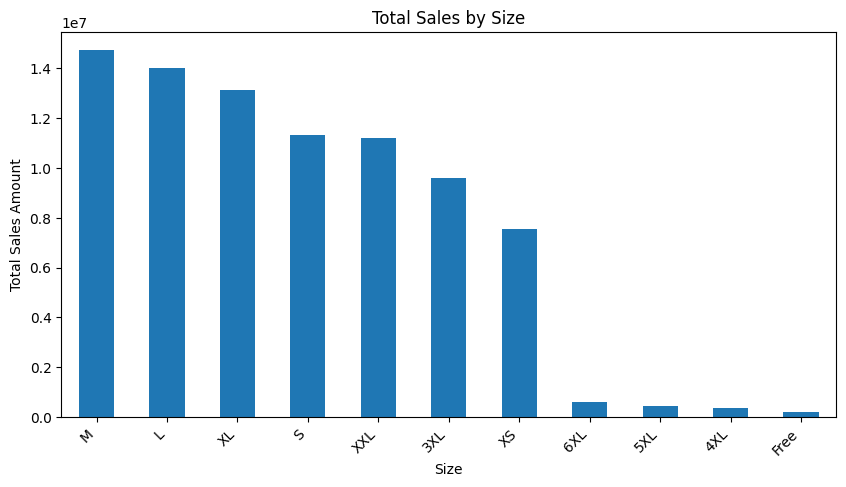

In [56]:
sales_by_category = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
print(sales_by_category)
sales_by_category.plot(kind='bar', figsize=(10, 5))
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

# Group by Size and analyze sales amount
sales_by_size = df.groupby('Size')['Amount'].sum().sort_values(ascending=False)
print(sales_by_size)
sales_by_size.plot(kind='bar', figsize=(10, 5))
plt.title('Total Sales by Size')
plt.xlabel('Size')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

2. How do sales volumes change over time (daily, weekly, monthly)?

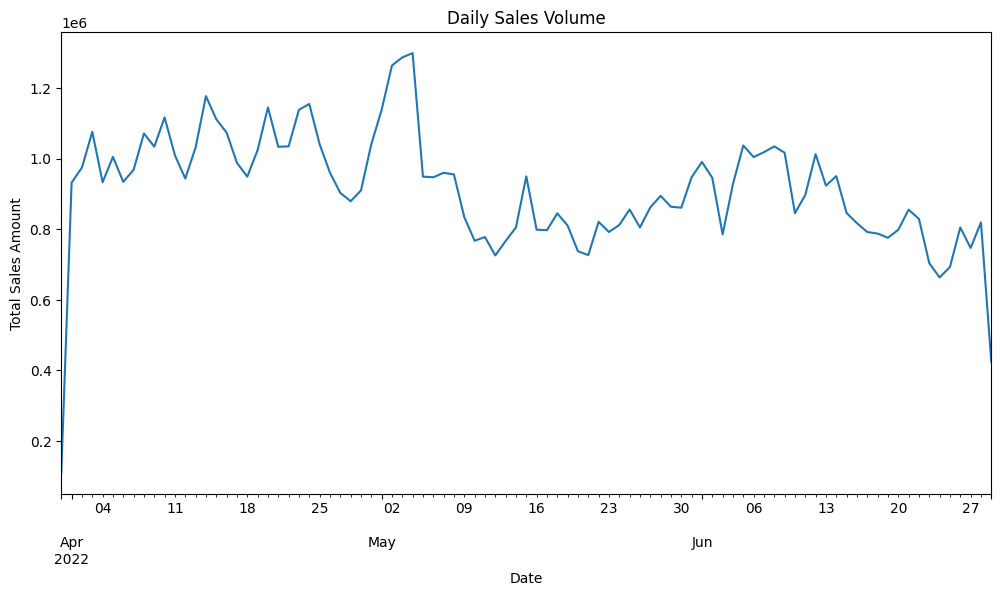

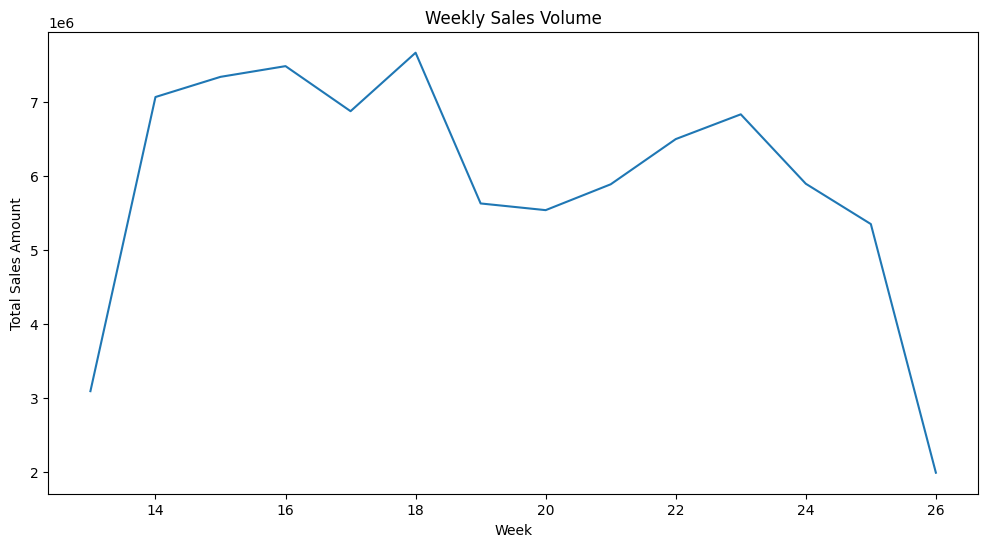

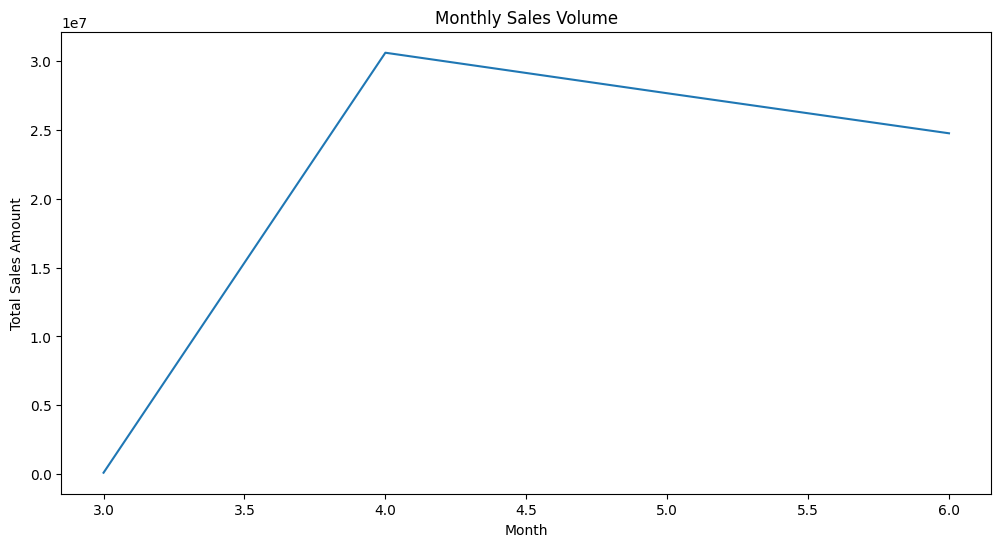

In [57]:
# Daily sales volume
daily_sales = df.groupby('Date')['Amount'].sum()
daily_sales.plot(figsize=(12, 6))
plt.title('Daily Sales Volume')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.show()

# Weekly sales volume
df['Week'] = df['Date'].dt.isocalendar().week
weekly_sales = df.groupby('Week')['Amount'].sum()
weekly_sales.plot(figsize=(12, 6))
plt.title('Weekly Sales Volume')
plt.xlabel('Week')
plt.ylabel('Total Sales Amount')
plt.show()


# Monthly sales volume
monthly_sales = df.groupby('Month')['Amount'].sum()
monthly_sales.plot(figsize=(12, 6))
plt.title('Monthly Sales Volume')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.show()


3. What percentage of orders face delivery delays or cancellations?

In [58]:
df['Status'].value_counts()

,count
Status,
Shipped,77801
Shipped - Delivered to Buyer,28769
Cancelled,18329
Shipped - Returned to Seller,1953
Shipped - Picked Up,973
Pending,658
Pending - Waiting for Pick Up,281
Shipped - Returning to Seller,145
Shipped - Out for Delivery,35


In [68]:
def map_status(status):
  if status in ['Shipped',
                'Shipped - Delivered to Buyer',
                'Shipped - Returned to Seller',
                'Shipped - Returning to Seller',
                'Shipped - Out for Delivery',
                'Shipped - Rejected by Buyer',
                'Shipped - Lost in Transit',
                'Shipped - Damaged',
                'Shipped - Picked Up']:
    return 'Shipped'
  elif status in ['Pending', 'Pending - Waiting for Pick Up']:
    return 'Pending'
  elif status == 'Cancelled':
    return 'Cancelled'
  elif status == 'Shipping':
    return 'Shipping'

df['MappedStatus'] = df['Status'].apply(map_status)

In [69]:
# calculate the percentage of each status
total_orders = len(df)
shipped_orders = len(df[df['MappedStatus'] == 'Shipped'])
pending_orders = len(df[df['MappedStatus'] == 'Pending'])
shipping_orders = len(df[df['MappedStatus'] == 'Shipping'])
cancelled_orders = len(df[df['MappedStatus'] == 'Cancelled'])

shipped_percentage = (shipped_orders / total_orders) * 100
pending_percentage = (pending_orders / total_orders) * 100
shipping_percentage = (shipping_orders / total_orders) * 100
cancelled_percentage = (cancelled_orders / total_orders) * 100

print(f"Percentage of Shipped Orders: {shipped_percentage:.2f}%")
print(f"Percentage of Pending Orders: {pending_percentage:.2f}%")
print(f"Percentage of Shipping Orders: {shipping_percentage:.2f}%")
print(f"Percentage of Cancelled Orders: {cancelled_percentage:.2f}%")


Percentage of Shipped Orders: 85.05%
Percentage of Pending Orders: 0.73%
Percentage of Shipping Orders: 0.01%
Percentage of Cancelled Orders: 14.21%


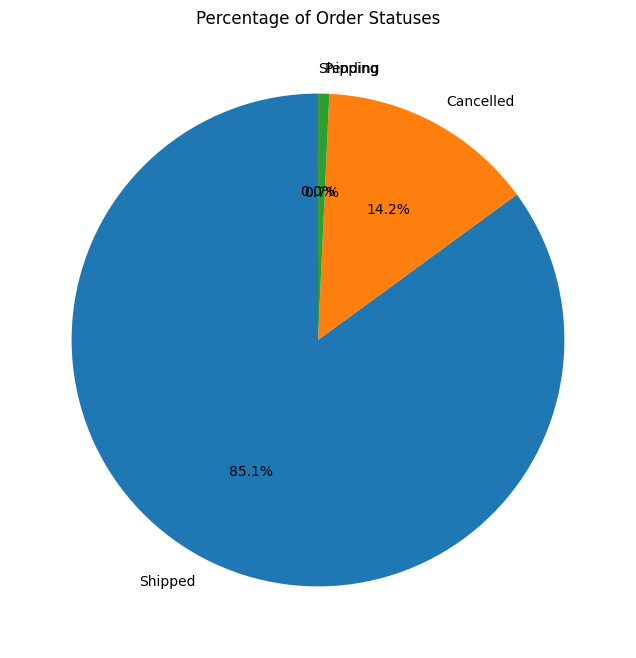

In [70]:
# Create a pie chart to visualize the percentage of order statuses
order_status_counts = df['MappedStatus'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(order_status_counts, labels=order_status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Order Statuses')
plt.show()


# Download file

In [71]:
df.to_excel("amazon_processed.xlsx")
df.to_csv("amazon_processed1.csv")